# Real-world Data Wrangling

# Gather data
in this section, you will extract data using two different gathering methods and combine the data different types of data gathering methods.

**1.1** in 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

**In this dataset, I aim to answer two key questions:

**Question 1: What is the distribution of book counts among different categories?

**Question 2: What is the distribution of order statuses as a percentage of the total number of orders?

As part of this project, I will perform data cleaning and assessment on two datasets. However, during the data wrangling process, I encountered an issue with a 404 error page. Fortunately, this page does not have a significant impact on my analysis, so I have chosen to skip it and focus on the primary dataset for analysis.

**1.2** Gather at least two datasets using two different data gathering methods:
 1. Programmatically downloading files
 2. Gather data by accesing APIs
 3. Gather and extrct data from HTML using BeautifulSoup
 4. Extract from DataBase


In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


## Data set 1
### Dataset Description - Guftugu Publication
**Type**: csv

**Format : **

i used  Guftugu Publication dataset, sourced from Kaggle.

**Dataset Details:

* Name: Guftugu Publication
* Source: Kaggle
* File Size: 95,935 records

**Dataset Variables:
1. Order Number: Unique identifier for each order.
2. Order Status: Current status of the order.
3. Book Name: Name of the purchased book.
4. Order Date: Date the order was placed.
5. City (Billing): Billing city for the order
 
The city variable is unnecessary for the analysis, and will be identified and remo ved during cleaning




In [2]:
try:
    gp = pd.read_csv('GP Orders - 2.csv', encoding='utf-8')
    # Proceed with data processing using df2
except UnicodeDecodeError as e:
    # If you encounter a UnicodeDecodeError, it means there's an issue with the file's encoding
    # You can try specifying a different encoding based on the file's actual encoding
    # For example, 'iso-8859-1' or 'windows-1252' are common alternatives
    gp = pd.read_csv('GP Orders - 2.csv', encoding='iso-8859-1')
    # Proceed with data processing using df2
    # If the file still cannot be read, it may be corrupted or have other issues
    # Check the file's integrity and encoding

In [3]:
#inspect data visually
gp.head()

,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,??????? ?? ???? ??????,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,??????? ?? ???? ??????,1/20/2021 10:29,Karachi


## Dataset 2
### Dataset Description - Guftugu Website Scraping
**Type: HTML
**Overview:
I used web scraping method to scrape an HTML content of the website Guftugu Publication

**Pagination:

* Total Pages: 118 pages in total
* Records per Page: Each page contains 24 records

**Dataset variables:
1. Title: Name of the book	
2. Category	: category of the book
3. Price: Price of the book

The Price variable is unnecessary for the analysis, and will be identified and removed during cleaning

https://gufhtugu.com/product-category/gufhtugu

In [4]:
#FILL IN 2nd data gathering and loading method
import csv

# Define the base URL of the book category page
base_url = 'https://gufhtugu.com/product-category/gufhtugu-publications/'

# Initialize an empty list to store all book data
all_books_data = []

# Iterate through pages
page_number = 1
while True:
    # Construct the URL for the current page
    url = f'{base_url}page/{page_number}/'

    # Send an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all book items on the page
        book_items = soup.find_all('div', class_='product-small box')

        # Break the loop if there are no more book items
        if not book_items:
            break

        # Extract and append data for each book item
        for book_item in book_items:
            title = book_item.find('p', class_='name product-title woocommerce-loop-product__title').text
            category = book_item.find('p', class_='category uppercase is-smaller no-text-overflow product-cat op-7').text
            price = book_item.find('span', class_='price').text

            book_data = {
                'Title': title,
                'Category': category,
                'Price': price
            }

            all_books_data.append(book_data)

        # Move to the next page
        page_number += 1
    else:
        print(f"Failed to retrieve page {page_number}. Status code: {response.status_code}")
        break

# Specify the CSV file name
csv_file_name = 'all_books_data.csv'

# Save all the book data to a CSV file
with open(csv_file_name, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Title', 'Category', 'Price']
    csvwriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csvwriter.writeheader()
    csvwriter.writerows(all_books_data)

print(f"Data for {len(all_books_data)} books saved to {csv_file_name}")



Failed to retrieve page 6. Status code: 404
Data for 118 books saved to all_books_data.csv


In [5]:
gp_web = pd.read_csv('all_books_data.csv')

In [6]:
#inspect data visually

gp_web.head()

,Title,Category,Price
0,(C++),\n\t\t\tBest Selling\t\t,"₨1,000.00"
1,Aap ka Such – آپ کا سچ,\n\t\t\tGufhtugu Publications\t\t,"₨1,500.00"
2,Advance System Design – ایڈوانس سسٹم ڈیزائن,\n\t\t\tEmerging Technologies\t\t,"₨2,000.00 ₨1,500.00"
3,AI for Babies & Toddlers,\n\t\t\tBooks Under 750PKR\t\t,₨300.00
4,Aleem Ahmed Books Set – علیم احمد کتب سیٹ,\n\t\t\tAleem Ahmed\t\t,"₨10,200.00"


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

## Issue 1: Data Tideness - Every cell is a single value

A typicall tidy issue when loading a dataset (gp_web) is that it has multiple values in a single column that is a tideness issue

In [7]:
# inspecting the dataframe visually
gp_web.head()

,Title,Category,Price
0,(C++),\n\t\t\tBest Selling\t\t,"₨1,000.00"
1,Aap ka Such – آپ کا سچ,\n\t\t\tGufhtugu Publications\t\t,"₨1,500.00"
2,Advance System Design – ایڈوانس سسٹم ڈیزائن,\n\t\t\tEmerging Technologies\t\t,"₨2,000.00 ₨1,500.00"
3,AI for Babies & Toddlers,\n\t\t\tBooks Under 750PKR\t\t,₨300.00
4,Aleem Ahmed Books Set – علیم احمد کتب سیٹ,\n\t\t\tAleem Ahmed\t\t,"₨10,200.00"


visually, we can we both Title and price are having multiple values in a single row

In [8]:
#inspecting the dataframe gp_web programmatically


# Check for columns with multiple values
for column in gp_web.columns:
    # Check if the column contains string values
    if gp_web[column].apply(lambda x: isinstance(x, str)).all():
        # Check if there are multiple values in a cell separated by a delimiter (e.g., comma, space)
        if gp_web[column].str.contains(',').any() or gp_web[column].str.contains(' ').any():
            print(f"Column '{column}' has multiple values in a single cell.")


Column 'Title' has multiple values in a single cell.
Column 'Category' has multiple values in a single cell.
Column 'Price' has multiple values in a single cell.


**multiple values in a single cell are acceptable for the 'Title' and 'Category' columns, but it is not valid for the 'Price' column**

**According to my dataset 2 (GP), it also contains multiple values in the 'Book Name' column, but this is acceptable because one person can purchase more than one book. Therefore, it does not constitute a tidiness issue. Additionally, there are multiple values in the 'City' column, but these represent different districts within the same city and do not violate our analysis**

## ISSUE 2 QUALITY CONSISTENCY:

**In DataFrame gp**:


1. Book Name Type Issue: The "Book Name" column should contain only string values, and special symbols or non-text characters should be removed from this column.

2. City Type Issue: The "City" column should also contain only string values, and special symbols or non-text characters should be removed from this column

**In DataFrame gp_web**:

3. 1- symbols or non-text characters should be removed from the all the columns of gp_web.

In [9]:
#inspecting programmatically dataframe gp
gp.head()

,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,??????? ?? ???? ??????,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,??????? ?? ???? ??????,1/20/2021 10:29,Karachi


symbols or non-text characters should be removed from the Book Name and City (Billing) columns of gp. 

In [10]:
#inspecting programmatically dataframe gp_web
gp_web.head()

,Title,Category,Price
0,(C++),\n\t\t\tBest Selling\t\t,"₨1,000.00"
1,Aap ka Such – آپ کا سچ,\n\t\t\tGufhtugu Publications\t\t,"₨1,500.00"
2,Advance System Design – ایڈوانس سسٹم ڈیزائن,\n\t\t\tEmerging Technologies\t\t,"₨2,000.00 ₨1,500.00"
3,AI for Babies & Toddlers,\n\t\t\tBooks Under 750PKR\t\t,₨300.00
4,Aleem Ahmed Books Set – علیم احمد کتب سیٹ,\n\t\t\tAleem Ahmed\t\t,"₨10,200.00"


symbols or non-text characters should be removed from the all the columns of gp_web.

## ISSUE 3: QUALITY VALIDITY

**In gp**
Order Date Format Issue: The "Order Date" column should be converted to a datetime format to facilitate date-related operations.


In [11]:
#inspect programmatically
gp.dtypes

Order Number       int64
Order Status      object
Book Name         object
Order Date        object
City (Billing)    object
dtype: object

In [12]:
gp_web.dtypes

Title       object
Category    object
Price       object
dtype: object

The data types shownin gp_web for the columns appear to be valid data types in a DataFrame. 

In [13]:
assert gp['Order Number'].dtypes == 'int64'


## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [14]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
copied_gp = gp.copy()


In [15]:
copied_gp_web = gp_web.copy()

In [16]:
copied_gp.head()

,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,??????? ?? ???? ??????,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,??????? ?? ???? ??????,1/20/2021 10:29,Karachi


### RESOLVING CONSISTENCY ISSUES IN BOTH DATASETS

In [17]:
#CONSISTENCY CHECK
# Clean the "Book Name" column to remove special symbols
# Clean the "Book Name" column to remove special symbols
copied_gp['Book Name'] = copied_gp['Book Name'].str.replace(r'[^A-Za-z\s]+', '', regex=True)

# Clean the "City (Billing)" column to remove special symbols
copied_gp['City (Billing)'] = copied_gp['City (Billing)'].str.replace(r'[^A-Za-z\s]+', '', regex=True)

In [18]:
copied_gp.head()

,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safarWaqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,,1/20/2021 10:29,Karachi


In [19]:
# Strip leading and trailing whitespace
copied_gp= copied_gp.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace empty cells with NaN
copied_gp = copied_gp.replace('', np.nan)

In [20]:
copied_gp.head()

,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,NaN,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safarWaqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,NaN,1/20/2021 10:29,Karachi


Consistency issues resolved in the dataset copied_gp

In [21]:
copied_gp_web.head()

,Title,Category,Price
0,(C++),\n\t\t\tBest Selling\t\t,"₨1,000.00"
1,Aap ka Such – آپ کا سچ,\n\t\t\tGufhtugu Publications\t\t,"₨1,500.00"
2,Advance System Design – ایڈوانس سسٹم ڈیزائن,\n\t\t\tEmerging Technologies\t\t,"₨2,000.00 ₨1,500.00"
3,AI for Babies & Toddlers,\n\t\t\tBooks Under 750PKR\t\t,₨300.00
4,Aleem Ahmed Books Set – علیم احمد کتب سیٹ,\n\t\t\tAleem Ahmed\t\t,"₨10,200.00"


In [22]:
import re
# Define a regular expression pattern to match English book names
english_pattern = re.compile(r'[A-Za-z+ ]+')

# Assuming you have a DataFrame called 'book' with a 'title' column
# Apply the regular expression to the 'title' column and create a new 'Book Name' column
copied_gp_web['Book Name'] = copied_gp_web['Title'].apply(lambda x: ' '.join(english_pattern.findall(x)))

copied_gp_web['Category'] = copied_gp_web['Category'].str.replace(r'[\n\t]+', '', regex=True)

# Drop the original 'title' column if not needed
copied_gp_web = copied_gp_web.drop(columns=['Title'])


In [23]:
copied_gp_web.head()

,Category,Price,Book Name
0,Best Selling,"₨1,000.00",C++
1,Gufhtugu Publications,"₨1,500.00",Aap ka Such
2,Emerging Technologies,"₨2,000.00 ₨1,500.00",Advance System Design
3,Books Under 750PKR,₨300.00,AI for Babies Toddlers
4,Aleem Ahmed,"₨10,200.00",Aleem Ahmed Books Set


### RESOLVED CONSISTENCY ISSUES IN BOTH DATAFRAMES

## RESOLVING  VALIDITY ISSUES 

In [24]:
#change the data type of Order Date
copied_gp['Order Date'] = pd.to_datetime(copied_gp['Order Date']).dt.date

### RESOLVED VALIDITY AND CONSISTENCY ISSUES IN BOTH THE DATASETS

As the tidiness issues lies with the column name PRICE and i dont want that perticulary Price column so im am droping that and this is the only Tidiness issue i these datasets

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [25]:
copied_gp_web = copied_gp_web.drop(columns=['Price'])


In [26]:
copied_gp = copied_gp.drop(columns = ['City (Billing)'])

In [27]:
#merge 2 dataframes into 1
merged_df = pd.merge(copied_gp, copied_gp_web, on='Book Name', how='inner')


In [28]:
merged_df.head()

,Order Number,Order Status,Book Name,Order Date,Category
0,70959,Completed,R ka Taaruf,2021-01-20,Books Under 750PKR
1,70783,Completed,R ka Taaruf,2021-01-16,Books Under 750PKR
2,70585,Completed,R ka Taaruf,2021-01-14,Books Under 750PKR
3,70550,Completed,R ka Taaruf,2021-01-14,Books Under 750PKR
4,70379,Completed,R ka Taaruf,2021-01-11,Books Under 750PKR


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [29]:
#FILL IN - saving data
# Specify the CSV file name for the merged DataFrame
csv_file_name = 'Merged_Data.csv'

# Save the merged DataFrame to a CSV file
merged_df.to_csv(csv_file_name, index=False)

print(f"Merged data saved to {csv_file_name}")


Merged data saved to Merged_Data.csv


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.


# Question: What is the distribution of book counts among different categories?


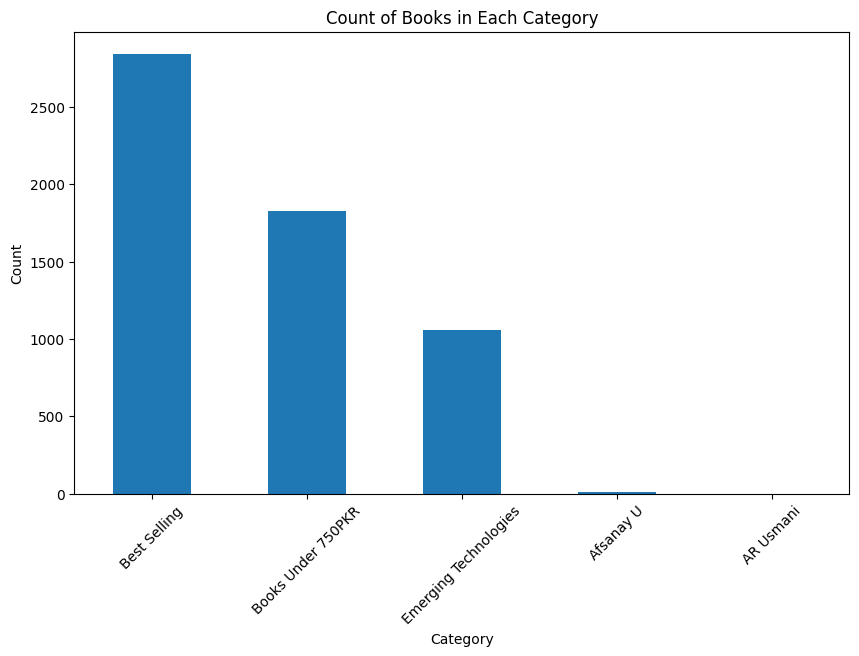

In [30]:
#Visual 1 - FILL IN
# 'Category' is the column containing book categories in your DataFrame
category_counts = merged_df['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of Books in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


The highest count of books is approximately 2500, which is the largest count,
while the smallest count is for the "ar usmani" category.


## Question: What is the distribution of order statuses as a percentage of the total number of orders?


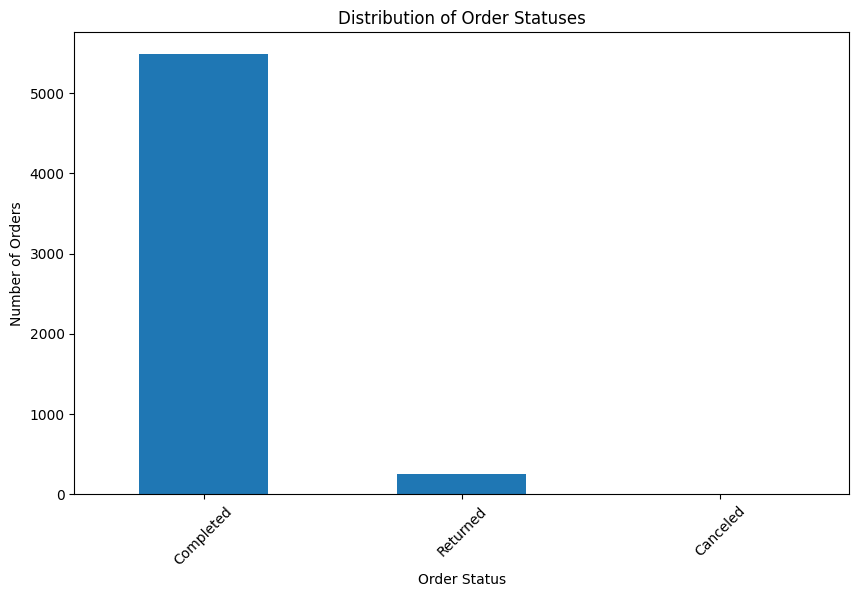

In [31]:

plt.figure(figsize=(10, 6));
order_status_counts = merged_df['Order Status'].value_counts()
order_status_counts.plot(kind='bar')
plt.title('Distribution of Order Statuses');
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45);


The highest number of orders are completed that

### **5.2:** Reflection



I'll conduct data accuracy checks by comparing the information in the datasets with trusted sources or performing data reconciliation to identify any inconsistencies or discrepancies.

I'll also assess data completeness by verifying that all relevant fields are populated and that there are no missing values, ensuring that the datasets are comprehensive and suitable for in-depth analysis